## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
treat_num = df[(df.group == 'treatment')&(df.landing_page!= 'new_page')].shape
treat_num

(1965, 5)

In [7]:
#df(query('group == "control" and landing_page != "old_page"')].shape
cont_num = df[(df.group == 'control')&(df.landing_page!= 'old_page')].shape
cont_num

(1928, 5)

In [8]:
#nbre of time new_page and treatment don't line up
(1965 +1928)

3893

f. Do any of the rows have missing values?

In [9]:
# missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# new dataframe df2
df2 = df[(df.group == 'treatment')&(df.landing_page == 'new_page')|(df.group == 'control')&(df.landing_page == 'old_page')]

In [11]:
df2.shape


(290585, 5)

In [12]:
#df2[(df2.group == 'treatment')&(df2.landing_page!= 'new_page')].shape

In [13]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [14]:
df2.shape

(290585, 5)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.



a. How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.user_id.duplicated()== True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2.drop_duplicates()

In [20]:
# check  no more duplicates
df2.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
# probability of an individual converting regardless of the page 
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2_control = df2.query('group == "control"')
df2_control.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [23]:
df3=df2_control
df3['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2_treatment = df2.query('group == "treatment"')
df2_treatment.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [25]:
df4=df2_treatment
df4['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [26]:
(df2.landing_page == 'new_page').mean()

0.5000636646764286

In [27]:
# let's just check for the old page
(df2.landing_page == 'old_page').mean()

0.4999363353235714

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.


This dataset includes two groups: control( old_page) and treatment(new_page). The convert rate is 11.96 regardless the page in the dataset. The convert rate for the old page is 12.04 % and for the new page 11.88%. The difference is only 0.15 %. Also, the chance for an individual to receive the new page or the old page is almost the same(50-50). This is not practically significant to make a decision. We need to implement an experiment to see if the difference is statistically significant.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothesis: p_new <= p_old
Alternative hypothesis: p_old < p_new

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [28]:
p_new = df2['converted'].mean()
# calculate the null coverated rate
# under the null hypothesis, p_new=p_old=p_null
p_null = p_new
p_null

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [29]:
p_old = df2['converted'].mean()
# under the null hypothesis, p_new=p_old=p_null
p_null = p_old
p_new

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [30]:
n_new = df2[df2['group'] == "treatment"]['user_id'].count()
print(n_new)

145311


d. What is $n_{old}$, the number of individuals in the control group?

In [31]:
n_old = df2[df2['group'] == "control"]['user_id'].count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.binomial(1, p = p_new, size = n_new) 
new_page_converted.mean()

0.12047264143801914

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.binomial(1, p = p_old, size = n_old) 
old_page_converted.mean()

0.11749521593678153

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
print(new_page_converted.mean()- old_page_converted.mean())

0.00297742550124


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
# set the seed
#random.seed(42)

p_diffs=[]

for _ in range(10000):
    p_new = np.array(np.random.binomial(size=n_new, n=1, p=p_null)).mean()
    p_old = np.array(np.random.binomial(size=n_old, n=1, p=p_null)).mean()
    p_diffs.append(p_new-p_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

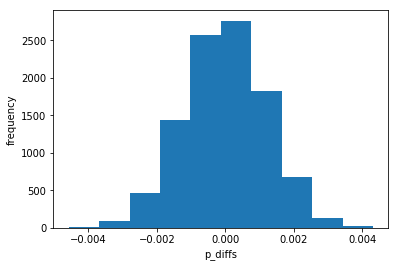

In [39]:
# plot the p_diffs under the null
plt.hist(p_diffs)
plt.xlabel("p_diffs")
plt.ylabel("frequency");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [40]:
# compute p-value
ab_data_diff = df2_treatment.converted.mean() - df2_control.converted.mean()
ab_data_diff

-0.0015790565976871451

In [41]:
(p_diffs > ab_data_diff).mean()

0.90480000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This is p-value, which means the probability of observing the actual difference in favor of the alternative hypothesis given the nul hypothesis is true.
If we set the threhold of type 1 error to be 5%, this p-value is larger than 0.05. That means we fail to reject the null hypothesis. Therefore, the null hypothesis is true which means the old page has a higher or equal convert rate than the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [42]:
import statsmodels.api as sm

convert_old =0.1196 
convert_new = 0.1204
n_old = 145274
n_new = 145311

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
z_score,p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])
z_score, p_value

(0.001570615434433255, 0.99874683070913362)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Yes, the result comfirme those in part jand k. 
z.scoreis 0.00157 which is way less than the critical value 1.96.
Once again, we fail to reject the null hypothesis and the old page remains better than the new page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
# create intercept column
df2['intercept']=1

# create dummy column for group column named as ab_page
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [45]:
import statsmodels.api as sm
logit = sm.Logit(df2.converted, df2[['intercept','ab_page']]);
results = logit.fit();

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               8.085e-06
Time:                        15:20:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.19 which is different from the p-value 0.9 we found in Part II. Because here we want to test if the ab_page is a significant factor in contributing the converted rate. So we have null hypothesis and alternative hypothesis as follows:
H0:ab_page=0
H1:ab_page≠0
This is two-sided test while in Part II we have one-sided test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

First, adding more factors could lower fitting error and make the model to fit the training data more precisely. However, the overfitting problem arises when we add many additional terms, which will produce a very bad predicting in future results or testing datasets.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
# load the countries dataframe
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
# joint the df2 and countries where we set up the index by user_id
df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [49]:
# create dummy column for country column named as ab_country, and we set up the US as the baseline variable (which will be unused)
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [50]:
# logistic regression
logit = sm.Logit(df3.converted, df3[['intercept','ab_page','CA','UK']]);
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               2.324e-05
Time:                        15:20:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
==============================================================================
"""

In [51]:
# add two interaction columns between page and CA and UK
df3['page_CA'] = df3.ab_page*df3.CA
df3['page_UK'] = df3.ab_page*df3.UK
df3['page_US'] = df3.ab_page*df3.US
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,page_CA,page_UK,page_US
user_id,,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1,0,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1,0,0,1


In [52]:
# logistic regression
logit = sm.Logit(df3.converted, df3[['intercept','ab_page','UK','CA','page_CA']]);
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               2.827e-05
Time:                        15:20:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1980
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9906      0.009   -221.524      0.000      -2.008      -1.973
ab_page       -0.0123      0.012     -1.048      0.295      -0.035       0.011
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
CA            -0.0134      0.038     -0.357      0.721      -0.087       0.060
page_CA       -0.0552      0.053     -1.035      0.301      -0.160       0.049
==============================================================================
"""

In [53]:
# logistic regression
logit = sm.Logit(df3.converted, df3[['intercept','ab_page','UK','CA','page_US']]);
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366111
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               2.590e-05
Time:                        15:20:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2388
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0018      0.021     -0.086      0.931      -0.043       0.039
UK             0.0006      0.018      0.031      0.975      -0.035       0.036
CA            -0.0501      0.030     -1.691      0.091      -0.108       0.008
page_US       -0.0188      0.025     -0.752      0.452      -0.068       0.030
==============================================================================
"""

In [54]:
# logistic regression
logit = sm.Logit(df3.converted, df3[['intercept','ab_page','UK','CA','page_UK']]);
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               3.126e-05
Time:                        15:20:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1555
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9850      0.009   -209.690      0.000      -2.004      -1.966
ab_page       -0.0236      0.013     -1.786      0.074      -0.049       0.002
UK            -0.0072      0.019     -0.387      0.699      -0.044       0.029
CA            -0.0407      0.027     -1.515      0.130      -0.093       0.012
page_UK        0.0344      0.026      1.306      0.192      -0.017       0.086
==============================================================================
"""

In [55]:
# logistic regression
logit = sm.Logit(df3.converted, df3[['intercept','ab_page','UK','CA','page_CA','page_UK']]);
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:               3.483e-05
Time:                        15:20:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
page_CA       -0.0469      0.054     -0.872      0.383      -0.152       0.059
page_UK        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

Conclusion
We could find out that when we add page_UK only, the p-value for ab_page is the lowest one compared with other fits. However, all of p-values of factors are not significant given the fact that their corresponding p-values are all greater than 0.05. Thus we may conclude that we can not reject the null hypothesis that the new page and the old page both have similar impact in converted rate. And the countries seem not to be a significant variable too.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])